# Rohdatenanalyse

## Importiere Abhängigkeiten








In [40]:
import pandas as pd
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import spacy

%matplotlib inline

In [ ]:
!python -m spacy download de
nlp = spacy.load('de')

## Laden der Daten
Die Daten können auch aus der raw.csv geladen werden. Hier werden die Daten aus einer URL geladen.

In [45]:
url = 'https://drive.google.com/file/d/1-_6n6LsEfOQccLQEMHz2qfyQ85c5oA7U/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
data = pd.read_csv(path)
data = data.fillna(0)
data = data.drop(columns=['label'])
print(data)

                                                   title    origin
0      Neue Leitlinie für Medikament zur Geburtseinle...  buzzfeed
1      16 Menschen, die definitiv nicht in die Nähe v...  buzzfeed
2      18 Ehemänner verraten, wann ihnen klar wurde, ...  buzzfeed
3      18 Dinge, die du Supermarkt-Angestellten in Ze...  buzzfeed
4      Die Bundesländer wollen mehr kranke Arbeiter e...  buzzfeed
...                                                  ...       ...
69392    Luis AG will ab September Elektroautos anbieten      wiki
69393                     Politiker kritisieren Hartz IV      wiki
69394  "La Juive" erstmals seit 1931 an der Bayerisch...      wiki
69395  Neapel: Razzia gegen die Camorra – Berlusconi-...      wiki
69396           Gazastreifen – Grenzöffnung nach Ägypten      wiki

[69397 rows x 2 columns]


## Datenreinigung

Einige Felder müssen bereinigt werden. Dieses wird mit der remove_suffix Funktion ausgeführt.

In [46]:
def remove_suffix(df, column_name_df, suffix):
    return df[column_name_df].apply(
        lambda x: x.replace(suffix, ""))

In [47]:
data["title"] = data["title"].astype(str)
data["title"] = remove_suffix(data,  "title", "| BRAVO")
data["title"] = remove_suffix(data,  "title", "| WEB.DE")

In [48]:
data

,title,origin
0,Neue Leitlinie für Medikament zur Geburtseinle...,buzzfeed
1,"16 Menschen, die definitiv nicht in die Nähe v...",buzzfeed
2,"18 Ehemänner verraten, wann ihnen klar wurde, ...",buzzfeed
3,"18 Dinge, die du Supermarkt-Angestellten in Ze...",buzzfeed
4,Die Bundesländer wollen mehr kranke Arbeiter e...,buzzfeed
...,...,...
69392,Luis AG will ab September Elektroautos anbieten,wiki
69393,Politiker kritisieren Hartz IV,wiki
69394,"""La Juive"" erstmals seit 1931 an der Bayerisch...",wiki
69395,Neapel: Razzia gegen die Camorra – Berlusconi-...,wiki


Es gibt zwei Kategorien. Wiki und Clickbaits (others). Diese werden hier gekennzeichnet.

In [49]:
data["category"] = data["origin"].apply(lambda x: "wiki" if x == "wiki" else "others")

In [50]:
data["category"]

0        others
1        others
2        others
3        others
4        others
          ...  
69392      wiki
69393      wiki
69394      wiki
69395      wiki
69396      wiki
Name: category, Length: 69397, dtype: object

## Datenanalyse

Eine Kope der Daten wird erstellt. Das Tortendiagramm zeigt die Herkunft der Clickbaits, im Rohzustand.

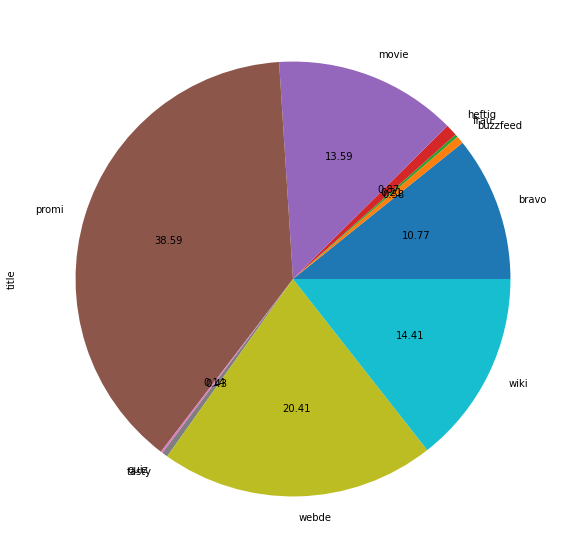

In [55]:
datagr = data.copy()
data_group = datagr.groupby("origin").agg("count")
data_group["title"].plot.pie( figsize=(10, 10), subplots=False, autopct="%.2f")

Die länge der Schlagzeilen je Kategorie und die durchschnittliche Wortlänge.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f31f98cdd30>,
      dtype=object)

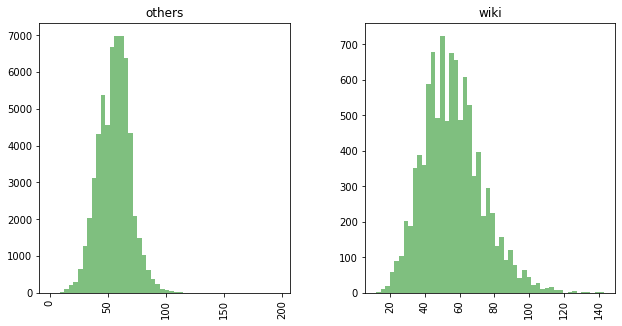

In [56]:
data['title'].str.len().hist(by=data['category'], color="g", alpha=0.5, bins=50, stacked=True, figsize=(10, 5))

In [57]:
data["title"] = data["title"].astype(str)

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f31f5913a20>,
      dtype=object)

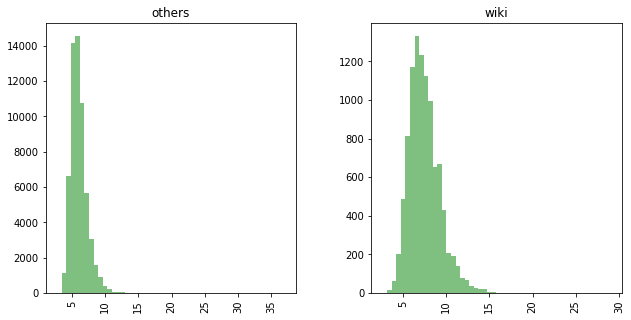

In [58]:
data['title'].str.split().apply(lambda x:[len(i) for i in x]).map(lambda x: np.mean(x)).hist(by=data['category'], color="g", alpha=0.5, bins=50, stacked=True, figsize=(10, 5))

Erneute Kopie der beiden Kategorien.

In [59]:
clickbaits=data[data.category=="others"].copy()
not_clickbaits=data[data.category=="wiki"].copy()

In [60]:
clickbaits
clickbaits.reset_index(drop=True)

,title,origin,category
0,Neue Leitlinie für Medikament zur Geburtseinle...,buzzfeed,others
1,"16 Menschen, die definitiv nicht in die Nähe v...",buzzfeed,others
2,"18 Ehemänner verraten, wann ihnen klar wurde, ...",buzzfeed,others
3,"18 Dinge, die du Supermarkt-Angestellten in Ze...",buzzfeed,others
4,Die Bundesländer wollen mehr kranke Arbeiter e...,buzzfeed,others
...,...,...,...
59392,Eröffnung der Berlinale 2014: Die Top und Flop...,promi,others
59393,"Die ""Wüstenblume"": Das ist die echte Waris Dirie",promi,others
59394,Barbara Schöneberger findet Helene Fischer per...,promi,others
59395,Sylvie Meis: Fake-Seite veröffentlicht gefälsc...,promi,others


In [61]:
not_clickbaits
not_clickbaits.reset_index(drop=True)

,title,origin,category
0,Parlamentswahlen in Myanmar: Manipulationsvorw...,wiki,wiki
1,Geringe Wahlbeteiligung in Mecklenburg-Vorpommern,wiki,wiki
2,David Irving vorzeitig aus der Haft entlassen,wiki,wiki
3,Rätselraten um Hinrichtungstermin Saddams,wiki,wiki
4,Putin unterstützt Wunsch Indiens nach einem fe...,wiki,wiki
...,...,...,...
9995,Luis AG will ab September Elektroautos anbieten,wiki,wiki
9996,Politiker kritisieren Hartz IV,wiki,wiki
9997,"""La Juive"" erstmals seit 1931 an der Bayerisch...",wiki,wiki
9998,Neapel: Razzia gegen die Camorra – Berlusconi-...,wiki,wiki


Diese Funktion führt das POS-tagging durch. Es dauert mehrere Minuten bis sie fertig ist.

In [37]:
def make_pos(df, common):
    ADJD = []
    ADJA = []
    PWAT = []
    PDAT = []
    PIS = []
    PWAV = []
    PTKA = []
    VAFIN = []
    PROAV = []
    ADV = []

    return_dict = dict()

    for title in df:
        for token in nlp(str(title).lower()):
            if token.tag_ == "ADJD":
                ADJD.append(token)
            if token.tag_ == "ADJA":
                ADJA.append(token)
            if token.tag_ == "PWAT":
                PWAT.append(token)
            if token.tag_ == "PDAT":
                PDAT.append(token)
            if token.tag_ == "PIS":
                PIS.append(token)
            if token.tag_ == "PWAV":
                PWAV.append(token)
            if token.tag_ == "PTKA":
                PTKA.append(token)
            if token.tag_ == "VAFIN":
                VAFIN.append(token)
            if token.tag_ == "PROAV":
                PROAV.append(token)
            if token.tag_ == "ADV":
                ADV.append(token)
    
    job_list = [ADJD, ADJA, PWAT, PDAT, PIS, PWAV, PTKA, VAFIN, PROAV, ADV]
    jobs = {"ADJD": ADJD, "ADJA": ADJA, "PWAT": PWAT, "PDAT": PDAT, "PIS": PIS, "PWAV": PWAV, "PTKA": PTKA, "VAFIN": VAFIN, "PROAV": PROAV, "ADV": ADV}

    for key, value in jobs.items():
        lemmas_job = [x.lemma_ for x in value]
        freq_job = Counter(lemmas_job)
        return_dict.update({key:{"freq_words": freq_job.most_common(common), "sum": len(freq_job)}})


    return return_dict

In [ ]:
data = make_pos(clickbaits["title"], 5)

In [39]:
data

{'ADJA': {'freq_words': [('neu', 1759),
   ('neue', 1474),
   ('erst', 922),
   ('groß', 633),
   ('helene', 561)],
  'sum': 3282},
 'ADJD': {'freq_words': [('tot', 477),
   ('früh', 404),
   ('wirklich', 349),
   ('grey', 344),
   ('gut', 300)],
  'sum': 1814},
 'ADV': {'freq_words': [('so', 5142),
   ('heute', 1649),
   ('jetzt', 922),
   ('wieder', 821),
   ('noch', 758)],
  'sum': 549},
 'PDAT': {'freq_words': [('dies', 3566),
   ('derselbe', 8),
   ('mabuses', 2),
   ('derrick', 1),
   ('mysteriös', 1)],
  'sum': 7},
 'PIS': {'freq_words': [('alle', 332),
   ('man', 325),
   ('viel', 168),
   ('all', 135),
   ('nichts', 85)],
  'sum': 58},
 'PROAV': {'freq_words': [('darum', 588),
   ('bieber', 294),
   ('deshalb', 251),
   ('dabei', 216),
   ('dazu', 90)],
  'sum': 44},
 'PTKA': {'freq_words': [('zu', 185), ('am', 93), ('allzu', 3)], 'sum': 3},
 'PWAT': {'freq_words': [('welch', 154), ('wieviel', 2), ('wer', 1)],
  'sum': 3},
 'PWAV': {'freq_words': [('wie', 488),
   ('warum', 18